In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from keras.layers import Lambda, Conv2D, MaxPooling2D, Dropout, Dense, Flatten, Cropping2D
from keras.models import Sequential
from keras.optimizers import Adam
from keras.callbacks import ModelCheckpoint
import csv
import argparse
import os
import cv2
import matplotlib.pyplot as plt

In [4]:
csv_path1 = '/Users/zhouwenbin/Downloads/data_UD/driving_log.csv'
df=pd.read_csv('/Users/zhouwenbin/Downloads/data_UD/driving_log.csv')
df.head(5)

,center,left,right,steering,throttle,brake,speed
0,IMG/center_2016_12_01_13_30_48_287.jpg,IMG/left_2016_12_01_13_30_48_287.jpg,IMG/right_2016_12_01_13_30_48_287.jpg,0.0,0.0,0.0,22.148290
1,IMG/center_2016_12_01_13_30_48_404.jpg,IMG/left_2016_12_01_13_30_48_404.jpg,IMG/right_2016_12_01_13_30_48_404.jpg,0.0,0.0,0.0,21.879630
2,IMG/center_2016_12_01_13_31_12_937.jpg,IMG/left_2016_12_01_13_31_12_937.jpg,IMG/right_2016_12_01_13_31_12_937.jpg,0.0,0.0,0.0,1.453011
3,IMG/center_2016_12_01_13_31_13_037.jpg,IMG/left_2016_12_01_13_31_13_037.jpg,IMG/right_2016_12_01_13_31_13_037.jpg,0.0,0.0,0.0,1.438419
4,IMG/center_2016_12_01_13_31_13_177.jpg,IMG/left_2016_12_01_13_31_13_177.jpg,IMG/right_2016_12_01_13_31_13_177.jpg,0.0,0.0,0.0,1.418236


In [5]:
path =  '/Users/zhouwenbin/Downloads/data_UD/'
# path = "/Users/zhouwenbin/Downloads/tekitou_data/"

In [6]:
center_db, left_db, right_db, steer_db = [], [], [], []
with open(csv_path1) as csvfile:
    reader = csv.DictReader(csvfile)
    for row in reader:
        center_db.append(row['center'])
        left_db.append(row['left'])
        right_db.append(row['right'])
        steer_db.append(float(row['steering']))

In [24]:
def crop_img(img):
    shape = img.shape
    #Cut off the sky from the original picture
    crop_up = shape[0]-100
    #Cut off the front of the car
    crop_down = shape[0]-25
    img = img[crop_up:crop_down, 0:shape[1]]
    return img

In [7]:
def resize_img(image):
    """
    This function cutoff the front of the car, sky and trees from original image 
    and then rezise to 64x64x3 
    """
    
    shape = image.shape
    #Cut off the sky from the original picture
    crop_up = shape[0]-100
    #Cut off the front of the car
    crop_down = shape[0]-25
    image = image[crop_up:crop_down, 0:shape[1]]
    
    #resize dimmension to 64x64 for the specific NN by NVIDIA 
    dim= (64,64)
    image = cv2.resize(image,dim, interpolation = cv2.INTER_AREA)
    return image

def rgb2yuv(image):
    """
    Convert the image from RGB to YUV
    """
    image = cv2.cvtColor(image, cv2.COLOR_RGB2YUV)

    return image

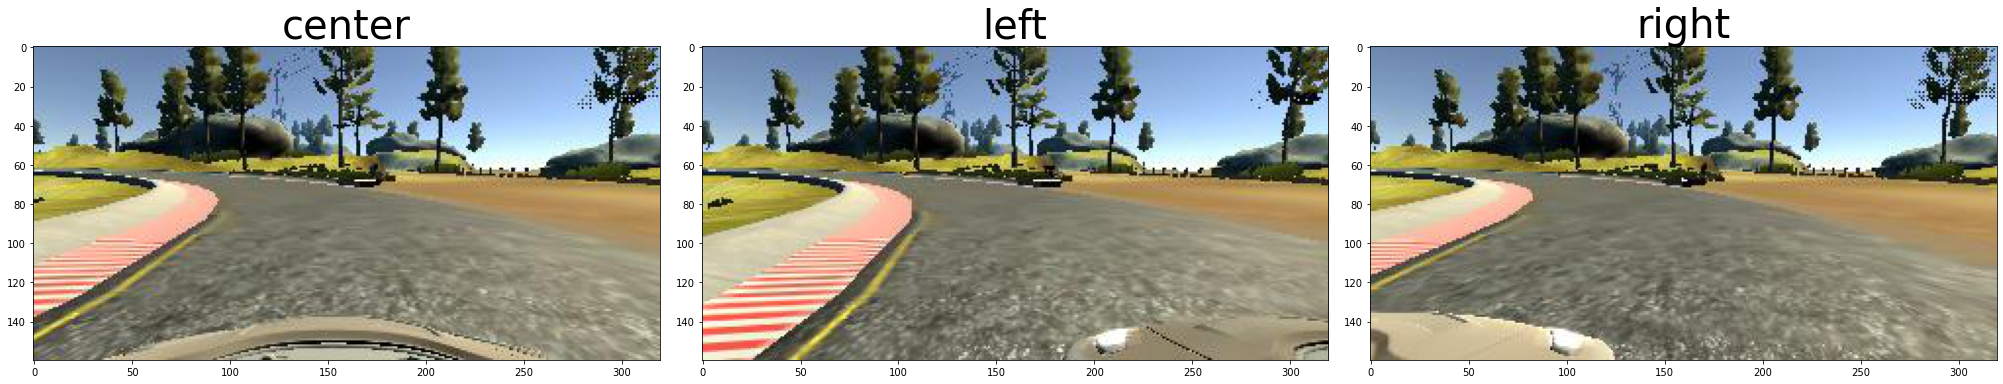

In [34]:
lc1=""
lc2=""
lc3=""
lc1 = path + center_db[7000]
lc2 = path + left_db[7000].split(" ")[-1]
lc3 = path + right_db[7000].split(" ")[-1]
img1 = cv2.cvtColor(cv2.imread(lc1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(lc2), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread(lc3), cv2.COLOR_BGR2RGB)


# Plot the result
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(28, 12))
f.tight_layout()

ax1.imshow(img1)
ax1.set_title('center', fontsize=40)
ax2.imshow(img2)
ax2.set_title('left', fontsize=40)
ax3.imshow(img3)
ax3.set_title('right', fontsize=40)

plt.savefig('./output_images/origin.png')
# cv2.imwrite('./output_images/center.png',img1)
# cv2.imwrite('./output_images/left.png',img2)
# cv2.imwrite('./output_images/right.png',img3)


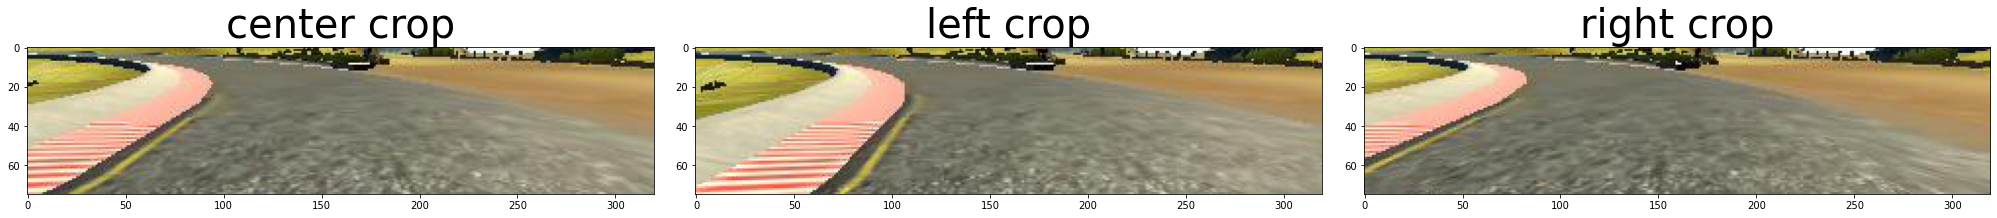

In [33]:
lc1=""
lc2=""
lc3=""
lc1 = path + center_db[7000]
lc2 = path + left_db[7000].split(" ")[-1]
lc3 = path + right_db[7000].split(" ")[-1]
img1 = cv2.cvtColor(cv2.imread(lc1), cv2.COLOR_BGR2RGB)
img2 = cv2.cvtColor(cv2.imread(lc2), cv2.COLOR_BGR2RGB)
img3 = cv2.cvtColor(cv2.imread(lc3), cv2.COLOR_BGR2RGB)

img1=crop_img(img1)
img2=crop_img(img2)
img3=crop_img(img3)

# Plot the result
f, (ax1,ax2,ax3) = plt.subplots(1, 3, figsize=(28, 12))
f.tight_layout()

ax1.imshow(img1)
ax1.set_title('center crop', fontsize=40)
ax2.imshow(img2)
ax2.set_title('left crop', fontsize=40)
ax3.imshow(img3)
ax3.set_title('right crop', fontsize=40)

plt.savefig('./output_images/crop.png')
# cv2.imwrite('./output_images/left_crop.png',img2)
# cv2.imwrite('./output_images/right_crop.png',img3)


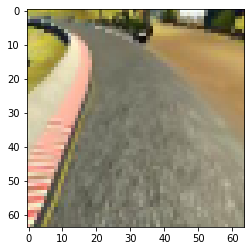

In [10]:
lc=""
lc = path + center_db[7000]
img = cv2.imread(lc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
shape = img.shape
#Cut off the sky from the original picture
crop_up = shape[0]-100
#Cut off the front of the car
crop_down = shape[0]-25
img = img[crop_up:crop_down, 0:shape[1]]

dim= (64,64)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)

plt.imshow(img)
plt.savefig('./output_images/corner_resize.png')

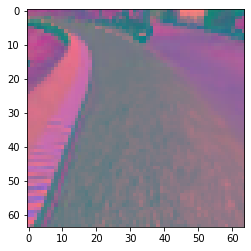

In [11]:
lc=""
lc = path + center_db[7000]
img = cv2.imread(lc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
shape = img.shape
#Cut off the sky from the original picture
crop_up = shape[0]-100
#Cut off the front of the car
crop_down = shape[0]-25
img = img[crop_up:crop_down, 0:shape[1]]

dim= (64,64)
img = cv2.resize(img,dim, interpolation = cv2.INTER_AREA)
img = cv2.cvtColor(img , cv2.COLOR_RGB2YUV)
plt.imshow(img)
plt.savefig('./output_images/corner_yuv.png')

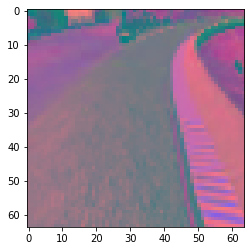

In [38]:
lc=""
lc = path + left_db[7000].split(" ")[-1]
img = cv2.imread(lc)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
img = rgb2yuv(img) 
img = resize_img(img)
# plt.imshow(img)
plt.imshow(cv2.flip(img,1))
plt.savefig('./output_images/flip.png')

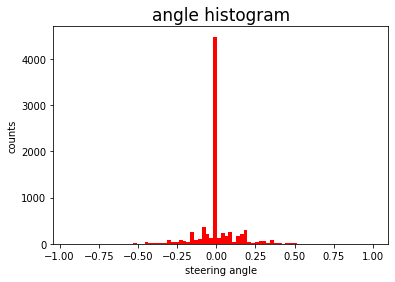

<Figure size 432x288 with 0 Axes>

In [39]:
plt.hist(steer_db, bins= 80, color= 'red', linewidth=0.1)
plt.title('angle histogram', fontsize=17)
plt.xlabel('steering angle')
plt.ylabel('counts')
plt.show()
plt.savefig('./output_images/histogram_nice.png')

In [203]:
def image_process(line, data_path):

    steering_center = float(line[3])
    # create adjusted steering measurements for the side camera images
    correction = 0.25# this is a parameter to tune
    steering_left = steering_center + correction
    steering_right = steering_center - correction
    
    source_path_center = line[0]
    source_path_left = line[1]
    source_path_right = line[2]
    
    filename_center = source_path_center.split('/')[-1]
    filename_left  =  source_path_left.split('/')[-1]
    filename_right  =  source_path_right.split('/')[-1]
    
    current_path_center = data_path+ filename_center
    current_path_left = data_path+ filename_left
    current_path_right = data_path + filename_right
    
    
    image_center = cv2.imread(current_path_center)

    # generate a flipped image
    augmented_images2= cv2.flip(image_center,1)
    augmented_images2= resize_img(augmented_images2)
    augmented_angle = steering_center*-1.0
    
    # transfer center image to YUV channel, crop and resize
    image_center2 = rgb2yuv(image_center)
    image_center2 = resize_img(image_center2)

    
    # transfer left image to YUV channel, crop and resize
    image_left = cv2.imread(current_path_left)
    image_left2 = rgb2yuv(image_left)
    image_left2 = resize_img(image_left2)


    # transfer right image to YUV channel, crop and resize
    image_right = cv2.imread(current_path_right)
    image_right2 = rgb2yuv(image_right)
    image_right2 = resize_img(image_right2)


    
    # save the processed image data with balance
    car_images.append(image_center2)
    car_images.append(image_left2)
    car_images.append(cv2.flip(image_left2,1))
    car_images.append(image_right2)
    car_images.append(cv2.flip(image_right2,1))
    car_images.append(augmented_images2)
    
    #save corresponding steering angles.
    steering_angles.append(steering_center)
    steering_angles.append(steering_left)
    steering_angles.append(steering_left*-1.0)
    steering_angles.append(steering_right)
    steering_angles.append(steering_right*-1.0)
    steering_angles.append(augmented_angle)


In [200]:

def collect_data(path):
    """
    filter the data wih a random ratio 1/4 on data with steering angle 0
    """
    
    lines=[]
    drive_log_path = path + "driving_log.csv"
    data_path = path + "IMG/"
    with open(drive_log_path) as csvfile:
        reader=csv.reader(csvfile)
        next(csvfile)
        for line in reader:
            lines.append(line)
    for line in lines:
        if float(line[3]) != 0:
            image_process(line,data_path)       
        else:
            prob = np.random.uniform()
            if prob <= 0.25:
                image_process(line,data_path)
                
                

In [204]:
#data 
car_images= []
steering_angles = []

collect_data(path);

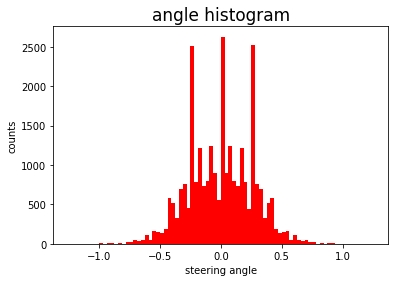

In [222]:
plt.hist(steering_angles, bins= 80, color= 'red', linewidth=0.1)
plt.title('angle histogram', fontsize=17)
plt.xlabel('steering angle')
plt.ylabel('counts')
plt.show()